# Vöruskipti

**Verkefni 4 - Aðgerðagreining**

*Jóhannes Reykdal Einarsson - jre5@hi.is*

Ég er með tvær myndir sem koma líklegast ekki í ipynb skjalið en þær má sjá í athugasemdum.

## Líkan

Við lýsum líkaninu sem stefndu neti $G=(V,\overline E)$ þar sem hnútarnir $V$ er mengi allra nemanda og leggur er frá notenda $i$ til nemanda $j$ ef að $j$ langar í hlutinn sem að $i$ er tilbúinn að skipta. Í netaframsetningunni hugsum við okkur að nemendur séu að gefa hvor öðrum hluti sem þeir eiga vitandi að þeir munu sjálfir fá eitthvað sem þá langar í til baka.

Tökum sem dæmi þrjár manneskjur Magnús, Silju og Björn. Magnús á epli en langar í banana, Silja á banana en langar í appelsínu og Björn á appelsínu en langar í epli. Ef við myndum setja upp net eins og að ofan fengist $G=$({Magnús, Silja, Björn}, {(Magnús, Björn), (Björn, Silja), (Silja, Magnús)}). Í staðinn fyrir að Silja og Magnús myndu skiptast og svo framvegis, gefur Magnús Birni eplið, Björn gefur Silju appelsínuna og Silja gefur Magnúsi bananann. 

<img src="./img/ras.jpg"/>

Í þessu dæmi sjáum við megin hugmynd líkansins. Ef við getum fundið stefnda rás í netinu höfum við fundið leið til þess að skipta á hlutum þannig að sérhver manneskja í rásinni gefi hlutinn sinn frá sér og fái einnig hlut sem hana langar í tilbaka. Við erum einfaldlega að færa vörurnar fram um einn hnút í rásinni. Þá gefur nemandi frá sér hlutinn sinn og fær hlut sem hann langar í í staðinn.

Við viljum þar með finna rásir í netinu þannig að sérhver nemandi er innihaldin í einhverri rás. Það er þó ekki öruggt að það sé hægt, til dæmis ef enginn myndi vilja eplið hjá Magnúsi. 

Þar sem að nemandi gerir ekkert grein fyrir því hvaða hlut hann langar mest í af þeim sem hann velur gerum við ráð fyrir því að hann langi jafn mikið í alla hlutina sem hann merkir við. Við gerum því ráð fyrir að hann sé sáttur þegar hann er kominn með einn af þeim hlutum. Hver nemandi mun því mest gefa frá sér einn hlut.

Við bætum síðan við einskonar inneignarkerfi þannig að nemandi getur fengið eða þegið vöru án þess að fá eða gefa í staðinn. Eftir "umferðina" getur þá nemandi verið með 1 í inneign ef hann gaf og fékk ekkert til baka, -1 ef hann fær og gefur ekkert eða 0 ef hann gefur og fær. Þá væri þessi inneign tekin með í næstu umferð. Til þess að útfæra þetta myndum við auk rása leyfa vegi. Fyrir innri punkta vegsins myndi ekkert breytast, þeir nemendur gæfu ennþá einn hlut og fengu einn í staðinn. Fyrsti nemandinn í veginum myndi hinsvegar einungis gefa og þá vera með inneignina 1 en síðasti nemandinn myndi bara fá hlut og þá vera með inneignina -1.

Ef við höldum áfram með dæmið að ofan nema gerðum ráð fyrir því að Silja vildi ekki appelsínu fengist:

<img src="./img/vegur.jpg"/>
Þar sem Silja væri með inneign 1, Magnús inneign 0 og Björn inneign -1. 

Með þessari lýsingu getum við sett stærðfræðilega fram líkan sem:
- hámarkar fjölda viðskiptavina
- forgangsraðar vörunum eftir eftirspurn
- lágmarkar þörfina á inneignum en leyfir ef nauðsyn krefur
- tekur tillit til fyrirliggjandi inneigna frá fyrri skiptum

### Mengi
Við höfum þrjú mengi:
- $V$ sem inniheldur alla nemendur sem eru að skipta
- $E=${$(i,j) |$ þannig að $j$ langar í hlut $i$}
- $C$ sem inniheldur núverandi inneign nemenda

### Ákvörðunarbreytur

Við höfum þrjár ákvörðunarbreytur.

Fyrir sérhverja tvennd í $E$ höfum við breytu $x_{ij}$ sem þarf að ákvarða. Hún er tvíeinda og skilgreind þannig að $x_{ij}=1$ ef $i$ gefur $j$ hlut en 0 annars.

Fyrir sérhvern nemanda skilgreinum við breytu $z_i$ sem táknar inneign nemandans.

Fyrir sérhvern nemanda skilgreinum við breytu $\hat z_i$ sem táknar hversu mikið nemandi notaði af fyrirliggjandi inneign. Við höfum efra mark $C_i$ á breytunni þar sem þú getur ekki notað meira af fyrri inneign en þú áttir.


### Parametrar 
Fyrir sérhvern hlut reiknum við hversu eftirsóttur hann er þ.e.a.s. hversu margir nemendur vilja hann. Við geymum það í vigri **$D$** sem er þannig að $D_i$ er hversu eftirsóknarverður hlutur $i$ er.

Við skilgreinum einnig tvo fasta
- **credit_penalty** táknað $\alpha$ sem skilgreinir hversu mikið það skiptir máli að lágmarka inneignir
- **demmand_increase** táknað $\beta$ sem skilgreinir hversu mikið það skiptir máli að taka tillit til hversu eftirsóknarverður hlutur er

### Skorður
Sérhver nemandi $k$ má einungis gefa hlutinn sinn einu sinni þ.e.a.s.
$$
\sum_{\{i\in V|(k,i)\in E\}}x_{ki} \leq 1
$$
Sérhver nemandi $k$ má bara þiggja einn hlut þ.e.a.s.
$$
\sum_{\{j\in V|(j,k)\in E\}}x_{jk} \leq 1
$$
Við athugum að þessar fyrstu tvær skorður tryggja í framsetningunni okkar að nemandi sé mest á einni rás eða á einum vegi.

Við setjum skorður á inneignina að hún sé jöfn útgráðu (hlutir sem manneskja gefur) mínus inngráðu (hlutir sem manneskja fær) plús hve mikið manneskja nemandi notaði af fyrirliggjandi inneign. Það er
$$
z_i = \sum_{(i,j)\in E}x_{ij} - \sum_{(k,i)\in E}x_{ki} + \hat z_i
$$

### Markfall
Við hámörkum fallið
$$
\zeta = \sum_{(i,j)\in E}x_{ij}+\sum_{(i,j)\in E}\beta\cdot(D_i+ D_j )\cdot x_{ij} - \sum_{i\in V} \alpha\cdot |z_i|
$$

Við skulum skoða það lið fyrir lið
- $\sum_{(i,j)\in E}x_{ij}$ tryggir að við hámörkum fjölda leggja og þar með skipta sem eru valin í umferðinni
- $\sum_{(i,j)\in E}\beta\cdot (D_i +D_j)\cdot x_{ij}$, þeimum hærra sem $D_i + D_j$ er þvi líklegri er sá leggur til þess að vera valinn. $D_j$ tryggir að ef $j$ á eftirsóttan hlut þá er hann líklegri til þess að fá eitthvað. $D_i+D_j$ tryggir þá að eftir því sem hluturinn þinn er eftirsóttari því líklegri ertu til þess að fá eftirsóttan hlut.
- $\sum_{i\in V} \alpha\cdot |z_i|$ tryggir að við notum sem minnsta inneign. Því meiri inneign sem er í notkun eftir umferðina þá verður frádrátturinn meiri.

Við skulum nefna að það reynist ekki nauðsynlegt að hafa fyrsta liðinn í markfallinu (tekinn með í 2. lið) en að hafa hann undirstrikar markmiðin sem við erum að reyna að ná, hámarka viðskipti, eftirsóttir fá eftirsótt og lágmarka inneign.



## Python útfærsla

Við byrjum á því að lesa inn gögnin úr google docs skjalinu.

In [5]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt

def load_data(sheet_id, gid="0"):
    """
    Load data from Google Sheets
    """
    URL = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}"
    df = pd.read_csv(URL)
    
    # Remove rows where the person is not offering anything
    df = df[df.iloc[:, 1].notna()]
    
    # A dict with the name of a person as key and the name of the item they're offering as value
    person_item_dict = {row.iloc[0]: row.iloc[1] for _, row in df.iterrows()}
    
    # The names of everyone offering an item
    names = list(person_item_dict.keys())
    
    # The names of everyone in the class
    names_all = df.columns[2:].tolist()
    
    # List of tuples (A,B) meaning person A wants the item person B is offering
    wants_list = []
    
    
    
    for _, row in df.iterrows():
        name_offering = row.iloc[0]
        for name_receiving, cell in zip(names_all, row[2:]):
            if name_receiving not in names:
                continue
            if str(cell).strip().lower() == 'x':
                wants_list.append((name_receiving, name_offering))
    
    return person_item_dict, names, names_all, wants_list

In [6]:
# Þá getum við sótt nemendurna
sheet_id = "1lEnQYqa-WjGByLrgw5wWHOgWTQaP1chga_p7-z00Ac4"
person_item_dict, names, names_all, wants_list = load_data(sheet_id)

print(person_item_dict)
print(names)
print(names_all)
print(wants_list)

{'sks36': 'hvítur monster', 'manib': 'góð bók', 'aau2': 'Sími', 'asg104': 'Golfkúla', 'ahg38': 'Tyggjó', 'bjb83': 'Áfengi', 'boh29': 'Stílabók', 'bhs24': 'Popp', 'bts5': 'Tússpenni', 'bam15': 'Nicotine', 'dii3': 'Páskaegg', 'daa41': 'útprentað bibliuvers', 'egg30': 'Pera', 'eip8': 'Fjörmjólk', 'erg62': 'Penni', 'fah21': 'Klósettpappír', 'gmt5': 'Tannbursti', 'ghb16': 'Collab', 'haa82': 'Gull', 'hog42': 'Powerade', 'hmi6': 'Tannkrem', 'hpr2': 'Bjór', 'hsh65': 'Sítrónu Kristall', 'iit2': 'Brauð', 'ibe15': 'sokka', 'iaa10': 'sleikjó', 'isn3': 'Tölva', 'iad3': 'Bíll', 'jks29': 'skyr', 'jre5': 'Cadbury Creme Egg', 'kak84': 'Egg', 'ltj2': 'Súkkulaði', 'mdj5': 'nocco', 'oat4': 'Pennaveski', 'otf2': 'Banani', 'pmj5': 'Collab', 'srs72': 'kaffi', 'sml11': 'rafhlaða', 'ssg55': 'Hænufóður', 'sbm13': 'Kartöflur', 'smb26': 'Næring +', 'slg40': 'Kókómjólk', 'sta34': 'Brauð', 'trr14': 'Crazy frogs', 'vab25': 'appelsínusafi', 'veo6': 'Fjöltengi', 'vme2': 'kjúklingur', 'vob7': 'Hleðsla', 'bad9': '?', 't

#### Skrifum nú kóða fyrir líkanið

In [10]:
def create_barter_model(person_item_dict, wants_list, people,  credit_penalty, demand_increase, previous_credits=None):
    """
    Býr til og leysir skptilíanið í Gurobipy.
    """

    model = gp.Model("Barter_System")

    # Smíða wanted items dictionary
    wanted_items = {}
    for receiver, giver in wants_list:
        if receiver not in wanted_items:
            wanted_items[receiver] = []
        wanted_items[receiver].append(giver)
        
    #Eftirsókn
    item_demand = {}
    for _, giver in wants_list:
        if giver not in item_demand:
            item_demand[giver] = 0
        item_demand[giver] += 1
    
    # ef engin fyrri innistæða þá sett sem 0
    if previous_credits is None:
        previous_credits = {person: 0 for person in people}
        
    #skilgreinum ákvörðunarbreytur
    x = {}
    for i,j in wants_list:
        x[i,j] = model.addVar(vtype=GRB.BINARY, name=f"x_{i}_{j}")
    
    z = {}
    for i in people:
        z[i] = model.addVar(lb=-GRB.INFINITY, name=f"z_{i}")
        
    z_hat = {}
    for i in people:
         max_use = max(0, previous_credits.get(i, 0)) 
         z_hat[i] = model.addVar(ub=max_use, name=f"z_hat_{i}")

    # Skilgreinum skorður
    for i in people:
        model.addConstr(gp.quicksum(x[i,j] for j in people if i != j and (i,j) in wants_list) <= 1)
    
    for j in people:
        model.addConstr(gp.quicksum(x[i,j] for i in people if i != j and (i,j) in wants_list) <= 1)
        
    for i in people:
        model.addConstr(
            z[i] == 
            gp.quicksum(x[i,j] for j in people if i != j and (i,j) in wants_list) -
            gp.quicksum(x[j,i] for j in people if i != j and (j,i) in wants_list) + z_hat[i]
        )
    
    # Búum til gervibreytu til þess að tákna tölugildi af inneigninni fyrir markfallið
    abs_credit = {}
    for i in people:
        abs_credit[i] = model.addVar(name=f"abs_credit_{i}")
        # Þessar skorður tryggja abs_credit[i] = |z[i]|
        model.addConstr(abs_credit[i] >= z[i])
        model.addConstr(abs_credit[i] >= -z[i])
    
    # Markfall
    
    # fyrsti hluti
    obj = gp.quicksum(x[i,j] for i in people for j in people if i != j and (i,j) in wants_list)
    
    # annar hluti
    for i in people:
        for j in people:
            if i != j and j in item_demand and (i,j) in wants_list and i in item_demand:
                obj += x[i,j] * demand_increase * (item_demand[j] + item_demand[i])

    #þriðji hluti
    obj -= credit_penalty * gp.quicksum(abs_credit[i] for i in people)
    
    model.setObjective(obj, GRB.MAXIMIZE)
    
    # leysum líkanið
    model.setParam('TimeLimit', 30)
    model.setParam('OutputFlag', 0)  # Suppress output
    
    model.optimize()
    
    # Er líkanið leyst
    if model.status == GRB.OPTIMAL or model.status == GRB.TIME_LIMIT:
        exchanges = []
        for i in people:
            for j in people:
                if i != j and (i,j) in wants_list and x[i,j].X > 0.5:
                    exchanges.append((i, j))
        
        #inneign
        credit_balances = {i: z[i].X for i in people}
        used_credit_values = {i: z_hat[i].X for i in people}
        
        return {
            'status': model.status,
            'exchanges': exchanges,
            'credit_balances': credit_balances,
            'used_credit': used_credit_values,
            'objective_value': model.objVal
        }
    else:
        return {
            'status': model.status,
            'exchanges': [],
            'credit_balances': {},
            'used_credit': {},
            'objective_value': 0
        }

#### Skrifum fall til þess að sýna niðurstöður

In [8]:
def print_results(results):
    print("Status:", "Optimal" if results['status'] == GRB.OPTIMAL else "Time Limit" if results['status'] == GRB.TIME_LIMIT else "Failed")
    print("\nExchanges:")
    for giver, receiver in results['exchanges']:
        print(f"{giver} gives {person_item_dict[giver]} to {receiver}")
    
    print("\nCredit Balances:")
    for person, credit in results['credit_balances'].items():
        if abs(credit) > 0.001:  # Only show non-zero credits
            print(f"{person}: {credit:.1f}")
    
    print("\nTotal exchanges:", len(results['exchanges']))
    print("Objective value:", results['objective_value'])

#### Keyrum líkanið

In [34]:
results = create_barter_model(person_item_dict, wants_list, names, 1,0.1)

print_results(results)

Set parameter TimeLimit to value 30
Status: Optimal

Exchanges:
sks36 gives hvítur monster to hog42
manib gives góð bók to trr14
aau2 gives Sími to bhs24
asg104 gives Golfkúla to otf2
bjb83 gives Áfengi to srs72
boh29 gives Stílabók to vab25
bts5 gives Tússpenni to jre5
bam15 gives Nicotine to haa82
egg30 gives Pera to ghb16
erg62 gives Penni to iaa10
fah21 gives Klósettpappír to aau2
gmt5 gives Tannbursti to slg40
ghb16 gives Collab to hpr2
haa82 gives Gull to sks36
hog42 gives Powerade to asg104
hpr2 gives Bjór to ltj2
iaa10 gives sleikjó to erg62
iad3 gives Bíll to jks29
jks29 gives skyr to pmj5
ltj2 gives Súkkulaði to mdj5
mdj5 gives nocco to bts5
oat4 gives Pennaveski to vme2
otf2 gives Banani to iad3
pmj5 gives Collab to smb26
srs72 gives kaffi to gmt5
ssg55 gives Hænufóður to fah21
smb26 gives Næring + to bjb83
slg40 gives Kókómjólk to oat4
trr14 gives Crazy frogs to manib
vab25 gives appelsínusafi to boh29
vme2 gives kjúklingur to egg30
taa9 gives Tyggjó to bam15

Credit Balanc

#### Skoðum niðurstöður myndrænt

In [24]:
def generate_detailed_graph(results, person_item_dict, filename="detailed_barter_graph.png"):
    """
    Generate a more detailed graph visualization
    """
    G = nx.DiGraph()
    
    # Prepare data for metrics
    gave_items = set()
    received_items = set()
    for giver, receiver in results['exchanges']:
        gave_items.add(giver)
        received_items.add(receiver)
    
    # Add nodes for people
    for person, item in person_item_dict.items():
        credit = results['credit_balances'].get(person, 0)
        
        # Determine node status
        gave = person in gave_items
        received = person in received_items
        
        if gave and received:
            node_color = 'lightgreen'  # Both gave and received
            status = "Gave & Received"
        elif gave:
            node_color = 'lightblue'   # Only gave
            status = "Only Gave"
        elif received:
            node_color = 'lightyellow' # Only received
            status = "Only Received"
        else:
            node_color = 'lightgray'   # Neither gave nor received
            status = "Did Not Participate"
        
        # Build detailed label
        label = f"{person}\nOffers: {item}\nStatus: {status}"
        if abs(credit) > 0.001:
            if credit > 0:
                label += f"\nCredit: +{credit:.1f}"
            else:
                label += f"\nCredit: {credit:.1f}"
                
        G.add_node(person, label=label, color=node_color, status=status)
    
    # Add edges for exchanges
    for giver, receiver in results['exchanges']:
        G.add_edge(giver, receiver, item=person_item_dict[giver])
    
    # Calculate network metrics
    metrics = {
        'total_exchanges': len(results['exchanges']),
        'participation_rate': (len(gave_items) + len(received_items)) / len(person_item_dict),
        'avg_degree': sum(dict(G.degree()).values()) / len(G),
    }
    
    # Create plot
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, seed=42, k=0.3)
    
    # Get node colors
    node_colors = [G.nodes[n]['color'] for n in G.nodes]
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=900, alpha=0.9)
    
    # Draw edges 
    nx.draw_networkx_edges(G, pos, edge_color='darkgray', width=2, arrowsize=20, 
                          connectionstyle='arc3,rad=0.1')
    
    # Draw labels
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight='bold', 
                           font_family='sans-serif')
    
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'item')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, 
                                font_color='darkblue', label_pos=0.3)
    
    # Add title with metrics
    plt.title(f"Barter System Exchanges\n" +
              f"Total Exchanges: {metrics['total_exchanges']} | " +
              f"Participation: {metrics['participation_rate']*100:.1f}%", 
              fontsize=18)
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=15, label='Gave & Received'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=15, label='Only Gave'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightyellow', markersize=15, label='Only Received'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgray', markersize=15, label='Did Not Participate')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.01, 0.99))
    
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Detailed graph saved to {filename}")
    


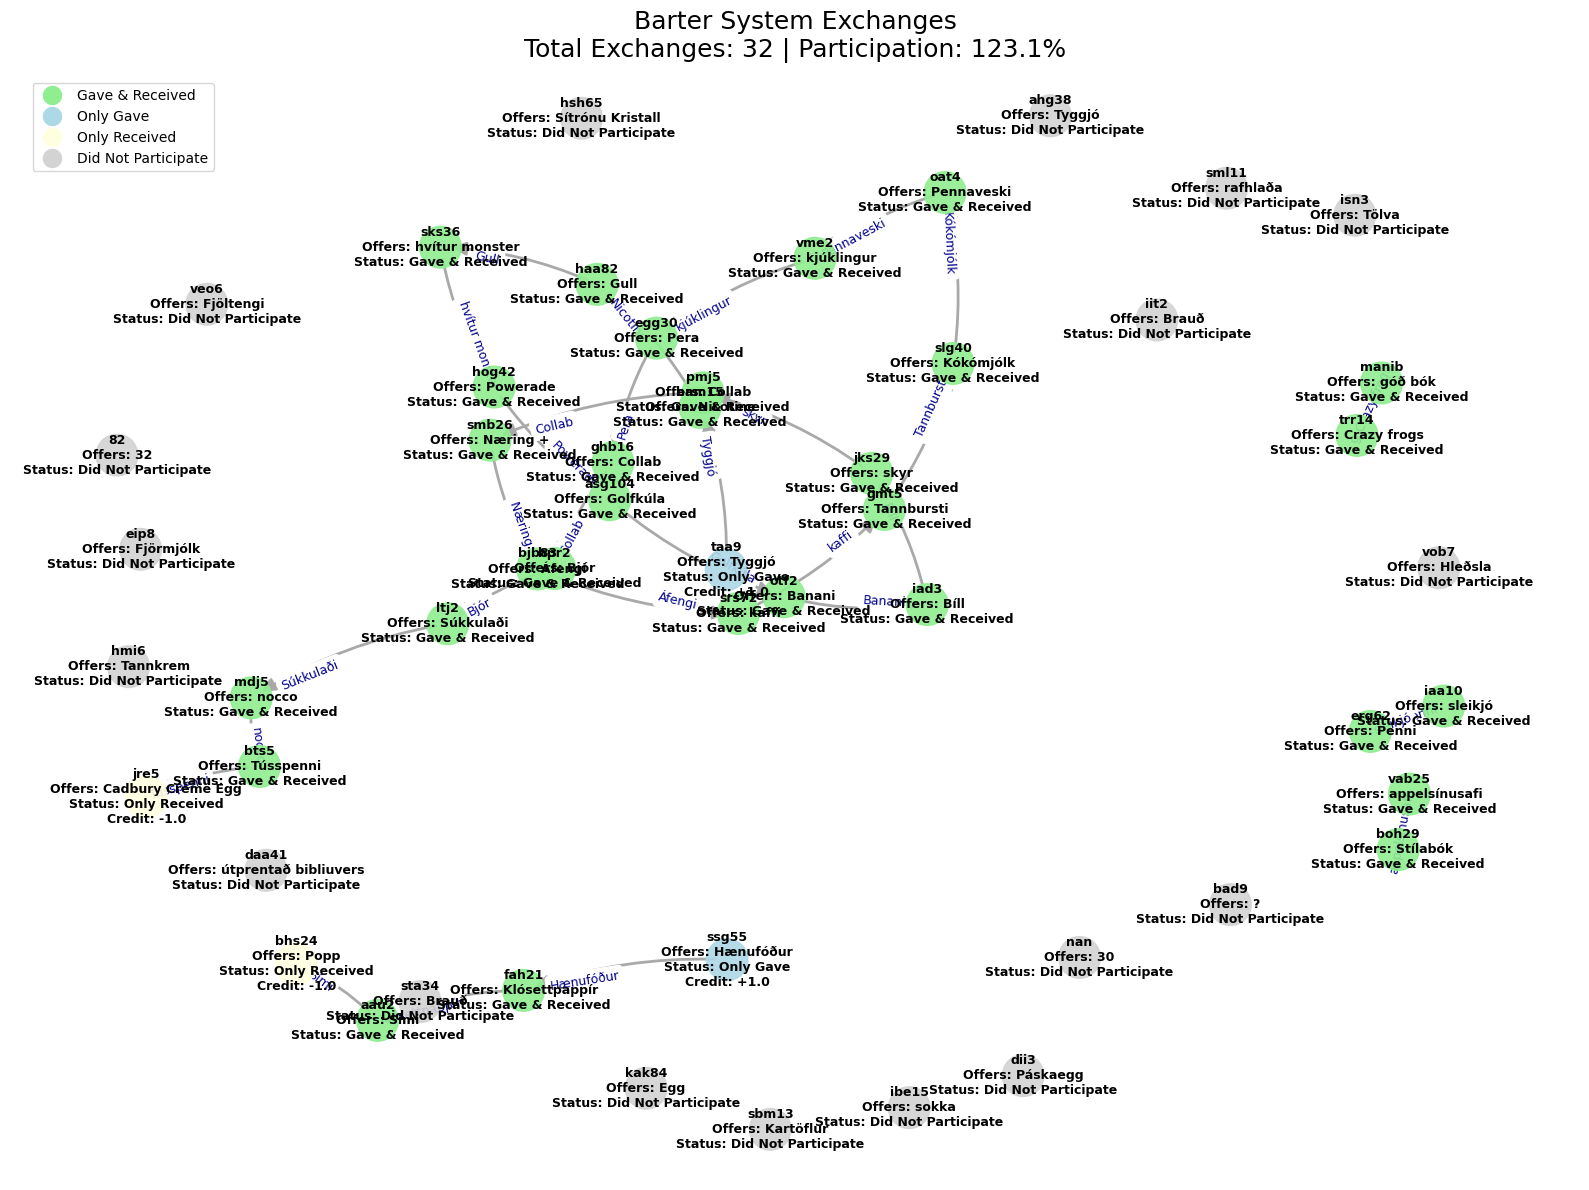

Detailed graph saved to detailed_barter_graph.png


In [35]:
generate_detailed_graph(results, person_item_dict)

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_detailed_graph_2(results, person_item_dict, filename="detailed_barter_graph.png"):
    """
    Generate a more detailed graph visualization of the barter system.
    Now only showing names on nodes.
    """
    G = nx.DiGraph()
    
    # Add nodes (just names)
    for person in person_item_dict.keys():
        G.add_node(person)
    
    # Add edges for exchanges
    for giver, receiver in results['exchanges']:
        G.add_edge(giver, receiver)
    
    # Draw graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42, k=0.3)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=900, alpha=0.9)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='darkgray', width=2, arrowsize=20, 
                           connectionstyle='arc3,rad=0.1')
    
    # Draw node labels (only names)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_family='sans-serif')
    
    # Add title
    plt.title("Barter System Exchanges", fontsize=16)
    
    # Save and show
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"Graph saved to {filename}")


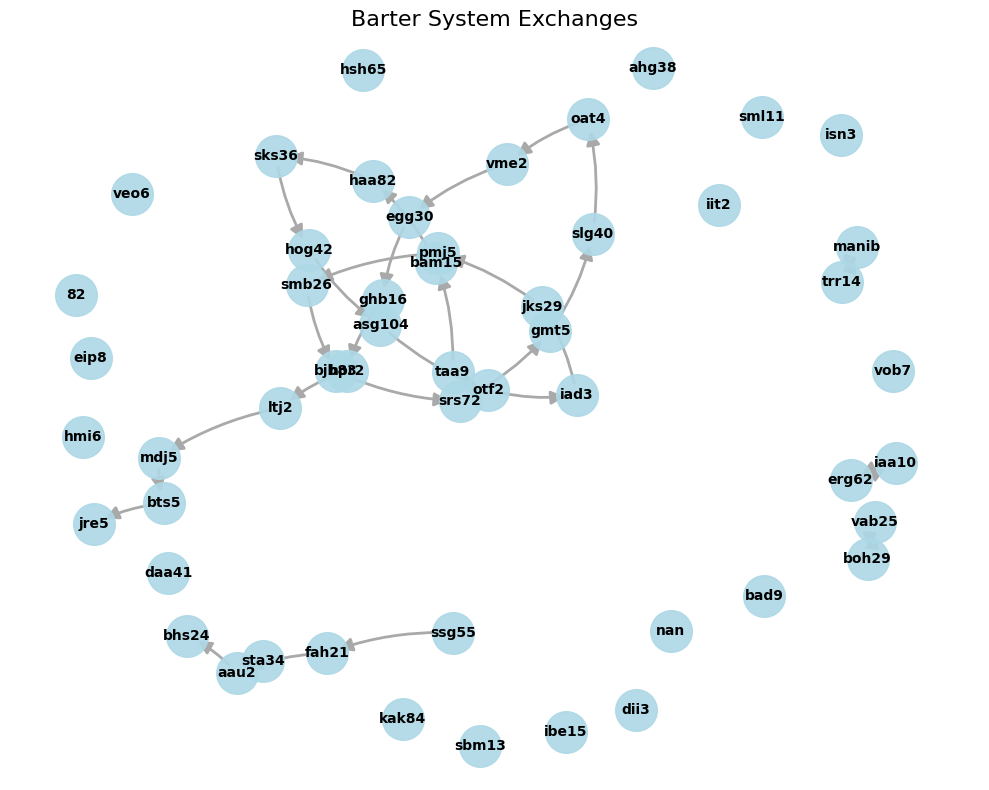

Graph saved to detailed_barter_graph.png


In [36]:
generate_detailed_graph_2(results, person_item_dict)

## Niðurstöður

Nú þegar við greinum líkanið þarf að meta tvennt. Annars vegar gildið á $\alpha$ þ.e.a.s. hversu mikið er dregið niður fyrir að hafa inneign og gildið á $\beta$ þ.e.a.s. hversu mikla áherslu við leggjum á eftirsókn. Við viljum finna jafnvægi á milli þessara stuðla þannig við lágmörkum inneign án þess að hafa of mikil áhrif á fjölda skipta og öfugt.

Við keyrum líknaið fyrir $(\alpha, \beta) = (0,0)$ og fáum 35 skipti þar sem að 20 nemendur enda með inneign. Við keyum svo líkanið fyrir $(\alpha, \beta) = (100,0)$. Þá er mínusinn fyrir að hafa inneign meiri en möguleg stig sem hægt er að fá svo engar inneignir eru notaðar. Þá eru 24 skipti. Við vitum þá á hvaða bili skipta við erum að vinna og getum þá ákvarða fastana til þess að minnka fjölda inneigna án þess að hafa of mikil áhrif á fjölda skipta.

Við endum á $(\alpha, \beta) = (1,0.1)$. Þá höfum við 34 skipti með einungis fjörum inneignum sem verður að teljast gott þar sem að mesti fjölda skipta sem við gátum fengið án áherslu á inneignir og eftirsókn voru 35. Það eru þó alltaf þónokkrir í lausnunum okkar sem gera engin skipti en það má búast við því þar sem það eru magir að bjóða upp á vöru sem engan langar í. Einnig eru margir sem langar einungis í sömu vörurnar og þá geta ekki allir fengið. En lausnin reynist góð, öll skipti eru rétt, þ.e.a.s. allir nemendur sem fá hlut fá hlut sem þá langar í. Við tökum einnig eftir að t.d. fær iaa10 hlut með eftirsókn 5 en hann er sjálfur með hlut með eftirsókn 7, sem staðfestir að nemendur með eftirsóknarverða hluti fá eftirsóknarverða hluti til baka.

Það mætti svo halda áfram með líkanið á ýmsa vegu. Við gætum haldið fleiri umferðir, þ.e.a.s. gert nýtt skiptinet og leyst með fyrrverandi inneignir. Síðan mætti leyfa hærri skuldir og inneignir þannig að fólk gæti gefið eða þegið fleiri hluti. Einnig mætti setja mismunadni virði á hlutina.  